In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal


data = pd.read_excel(r"C:\Users\然\Desktop\sea-ad_cohort_donor_metadata_072524.xlsx")
print(data.columns)

Index(['Donor ID', 'Primary Study Name', 'Secondary Study Name',
       'Age at Death', 'Sex', 'Race (choice=White)',
       'Race (choice=Black/ African American)', 'Race (choice=Asian)',
       'Race (choice=American Indian/ Alaska Native)',
       'Race (choice=Native Hawaiian or Pacific Islander)',
       'Race (choice=Unknown or unreported)', 'Race (choice=Other)',
       'specify other race', 'Hispanic/Latino', 'Highest level of education',
       'Years of education', 'APOE Genotype', 'Cognitive Status',
       'Age of onset cognitive symptoms', 'Age of Dementia diagnosis',
       'Known head injury', 'Have they had neuroimaging',
       'Consensus Clinical Dx (choice=Alzheimers disease)',
       'Consensus Clinical Dx (choice=Alzheimers Possible/ Probable)',
       'Consensus Clinical Dx (choice=Ataxia)',
       'Consensus Clinical Dx (choice=Corticobasal Degeneration)',
       'Consensus Clinical Dx (choice=Control)',
       'Consensus Clinical Dx (choice=Dementia with Lewy Bo

In [2]:
data_cleaned = data.dropna(subset=['Last MMSE Score'])
bins = [0, 10, 20, 26, 30]
labels = ['Severe', 'Moderate', 'Mild', 'Normal']
mean_age = data_cleaned['Last MMSE Score'].mean()
data_cleaned['Group'] = pd.cut(data_cleaned['Last MMSE Score'], bins=bins, labels=labels, include_lowest=True)
print(data_cleaned[['Last MMSE Score', 'Group']].head())
cell_columns = data_cleaned.columns[69:]
numeric_columns = data_cleaned[cell_columns].select_dtypes(include='number').columns
mean_values = data_cleaned.groupby('Group')[numeric_columns].mean()
display(mean_values)


   Last MMSE Score   Group
0             25.0    Mild
1             28.0  Normal
3             25.0    Mild
4             29.0  Normal
5             29.0  Normal


C:\Users\然\AppData\Local\Temp\ipykernel_7576\2630409395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Group'] = pd.cut(data_cleaned['Last MMSE Score'], bins=bins, labels=labels, include_lowest=True)
C:\Users\然\AppData\Local\Temp\ipykernel_7576\2630409395.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = data_cleaned.groupby('Group')[numeric_columns].mean()


,L2/3 IT,L5 IT,Pvalb,Vip,Sst,L4 IT,Astrocyte,L6 IT,Oligodendrocyte,Lamp5,...,Lamp5 Lhx6,L6 IT Car3,L5/6 NP,Microglia-PVM,Chandelier,Pax6,L5 ET,Endothelial,Sst Chodl,VLMC
Group,,,,,,,,,,,,,,,,,,,,,
Severe,16.420155,5.941339,8.840979,12.074873,10.194702,7.386981,4.052812,2.682377,9.910587,5.991477,...,2.189354,0.610011,1.019470,2.189354,0.986045,1.420573,0.250689,0.100276,0.125345,0.367678
Moderate,19.221299,7.459695,8.212042,9.004307,5.458190,5.913879,10.765421,2.334536,6.908512,5.943965,...,1.768799,0.730044,1.162589,4.774174,1.249088,0.871406,0.166498,0.321505,0.065387,0.569676
Mild,22.699419,7.577022,8.042494,6.918362,5.123854,6.351444,7.601017,3.484387,10.390248,3.947152,...,1.625243,1.026427,1.397277,3.547991,1.094841,0.669745,0.276968,0.247316,0.133065,0.446748
Normal,25.746620,7.328822,8.176843,7.357776,4.980627,5.717420,6.105808,3.230328,10.506889,3.889854,...,1.642218,0.952170,1.457299,3.048338,1.237117,0.629786,0.271110,0.196442,0.134501,0.334038


In [4]:
mean_values_melted = mean_values.reset_index().melt(id_vars='Group', var_name='Cell_Type', value_name='Mean_Proportion')
display(mean_values_melted)


,Group,Cell_Type,Mean_Proportion
0,Severe,L2/3 IT,16.420155
1,Moderate,L2/3 IT,19.221299
2,Mild,L2/3 IT,22.699419
3,Normal,L2/3 IT,25.746620
4,Severe,L5 IT,5.941339
...,...,...,...
91,Normal,Sst Chodl,0.134501
92,Severe,VLMC,0.367678
93,Moderate,VLMC,0.569676
94,Mild,VLMC,0.446748


C:\Users\然\AppData\Local\Temp\ipykernel_7576\328397938.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cell_Type', y='Mean_Proportion', hue='Group', data=mean_values_melted, ci=None)


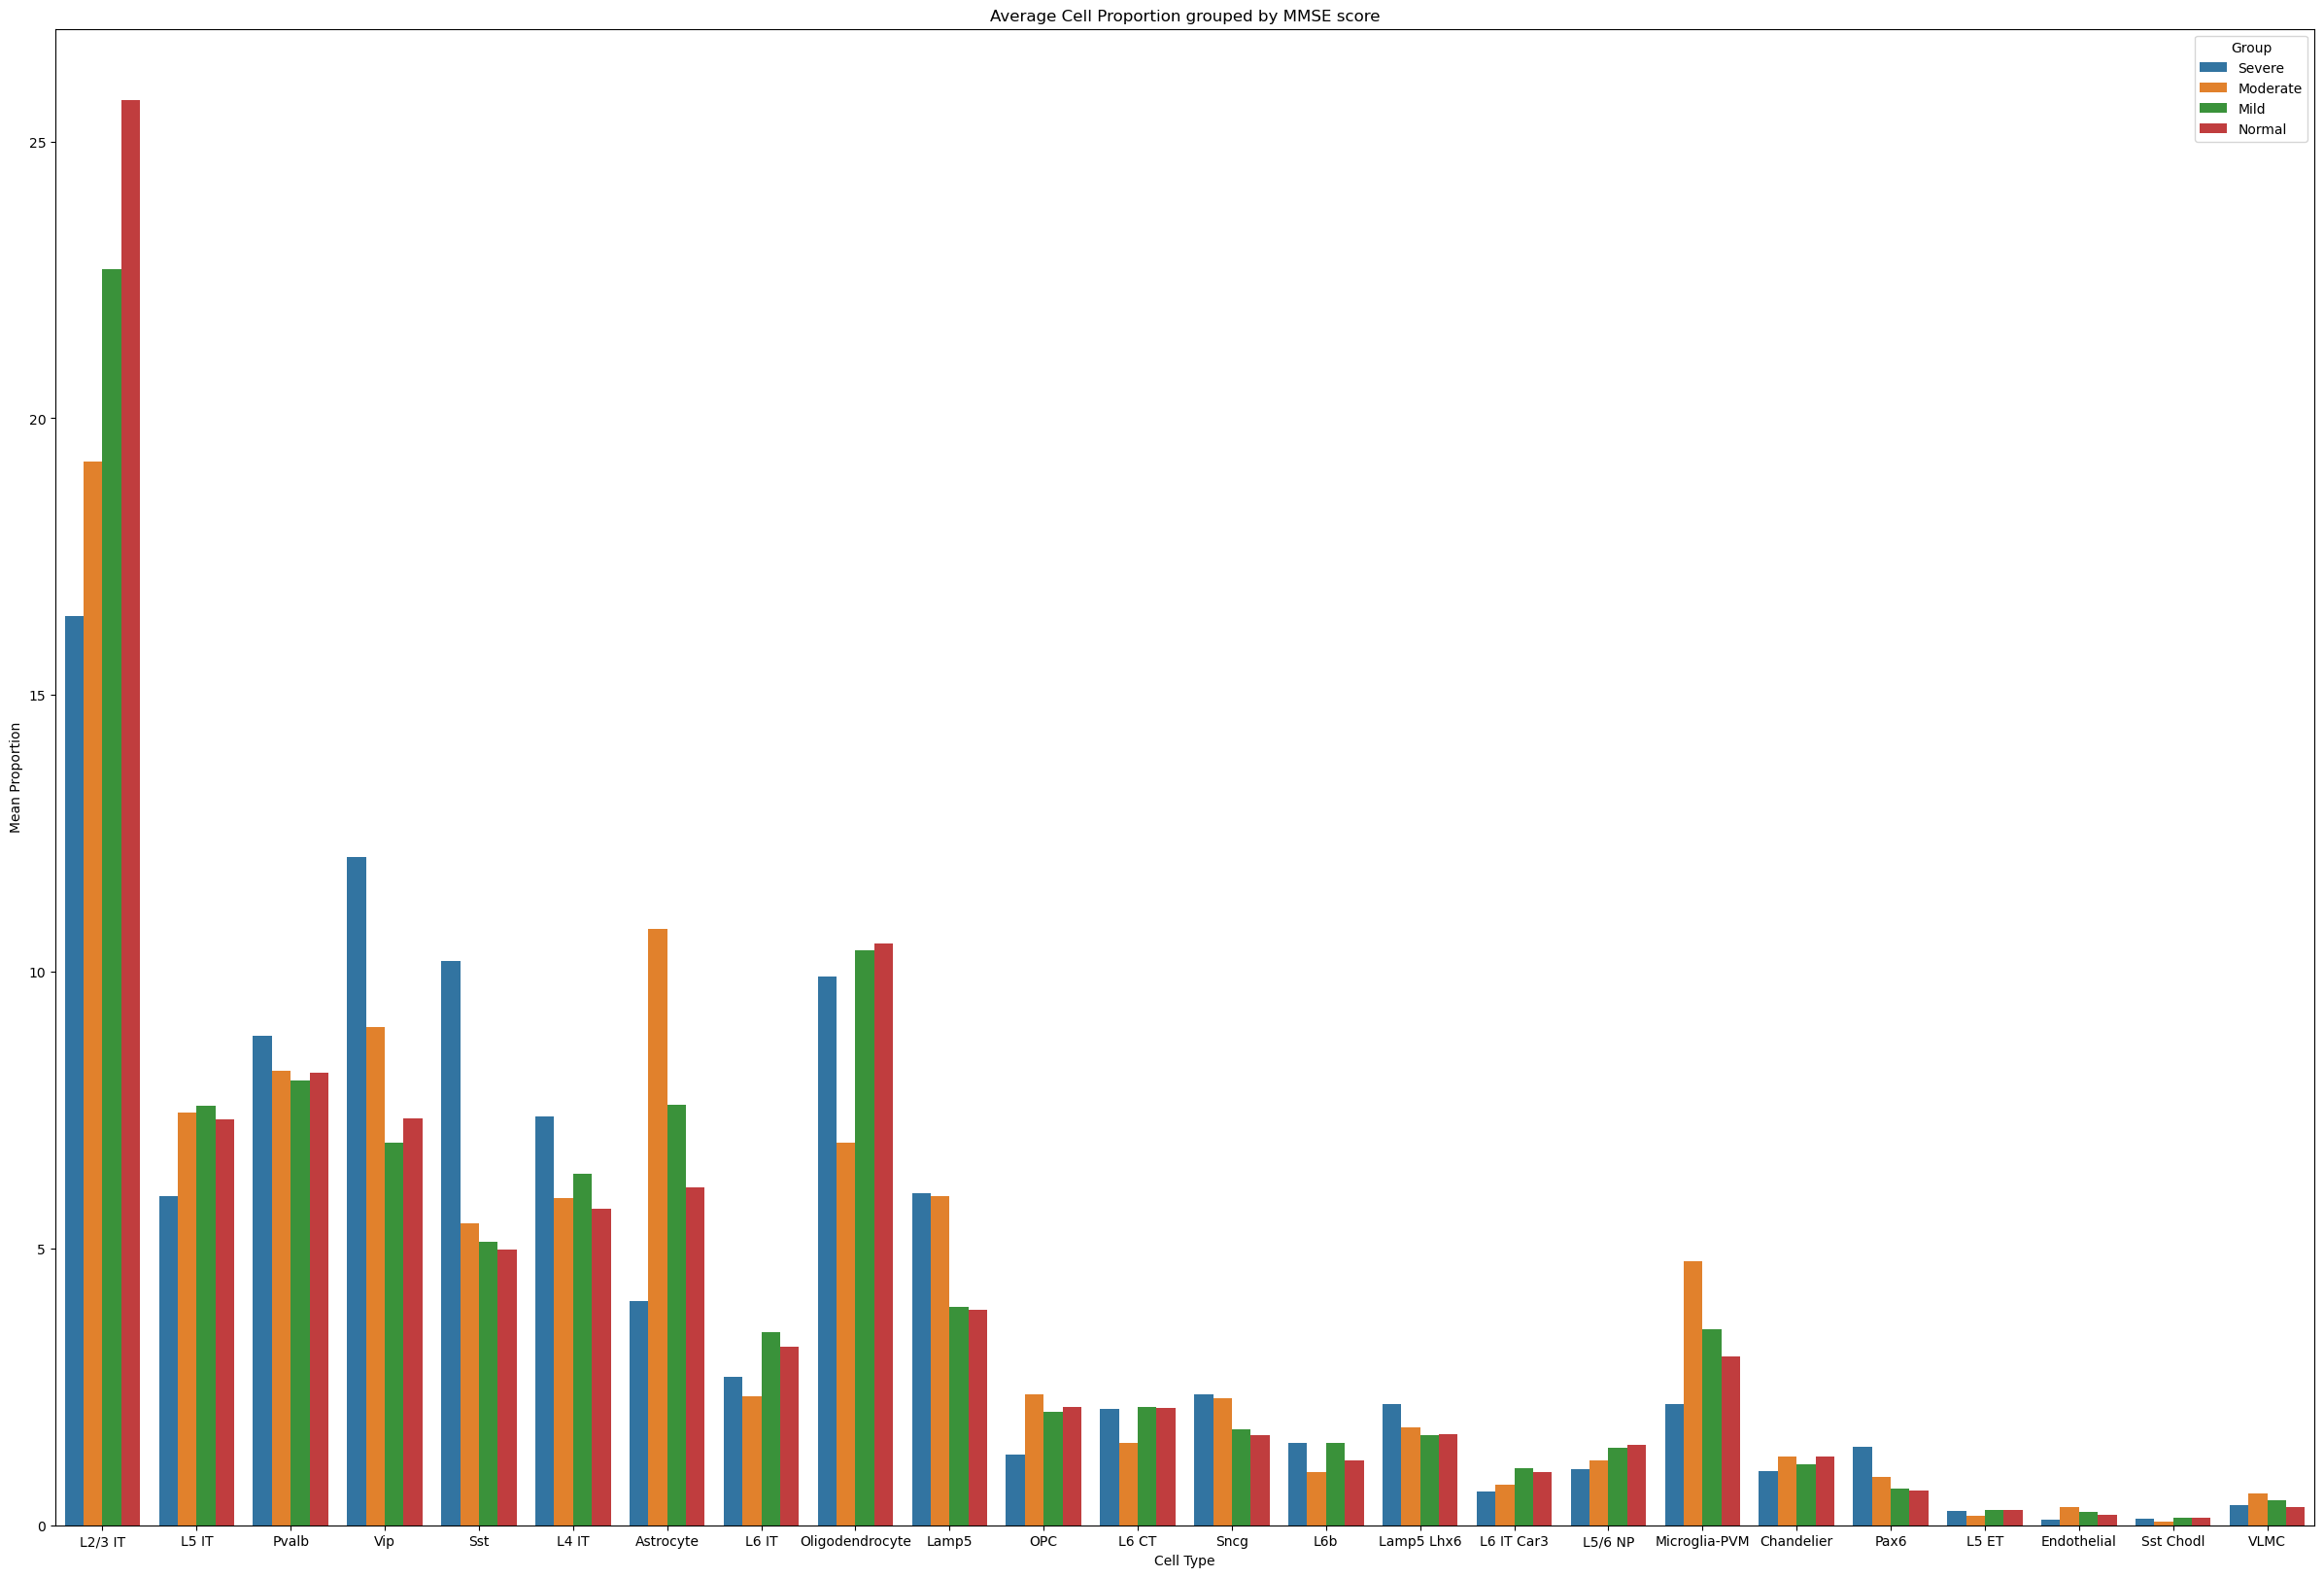

In [5]:
plt.figure(figsize=(30, 20))
sns.barplot(x='Cell_Type', y='Mean_Proportion', hue='Group', data=mean_values_melted, ci=None)
plt.title('Average Cell Proportion grouped by MMSE score')
plt.xlabel('Cell Type')
plt.ylabel('Mean Proportion')
plt.show()


In [6]:
for cell in cell_columns:
    group1 = data_cleaned[data_cleaned['Group'] == 'Severe'][cell].dropna()
    group2 = data_cleaned[data_cleaned['Group'] == 'Moderate'][cell].dropna()
    group3 = data_cleaned[data_cleaned['Group'] == 'Mild'][cell].dropna()
    group4 = data_cleaned[data_cleaned['Group'] == 'Normal'][cell].dropna()
    if len(group1) > 0 and len(group2) > 0 and len(group3) > 0 and len(group4) > 0:
        h_stat, p_value = kruskal(group1, group2, group3, group4)
        if p_value < 0.05:
            significance = "Significant"
            print({
              'Cell Type': cell,
              'H-statistic': h_stat,
              'p-value': p_value,
              'Significance': significance
                })
    else:
        print(f"Insufficient data for {cell}")




{'Cell Type': 'L2/3 IT', 'H-statistic': 8.038385217169576, 'p-value': 0.045225024546225186, 'Significance': 'Significant'}
{'Cell Type': 'Group', 'H-statistic': 77.99999999999999, 'p-value': 8.24075729190453e-17, 'Significance': 'Significant'}
